## Inter-track Webapp Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.compose import make_column_transformer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [2]:
rooms = pd.read_csv('bed123.csv')

In [3]:
rooms.head()

,title,location,price
0,3 BEDROOM,Ipaja,350000
1,3 BEDROOM,Yaba,1200000
2,1 BEDROOM,Surulere,600000
3,2 BEDROOM,Ogba,700000
4,1 BEDROOM,Mushin,400000


In [4]:
rooms.describe()

,price
count,6.368000e+03
mean,3.449577e+06
std,4.314816e+07
min,1.200000e+04
25%,5.500000e+05
50%,9.500000e+05
75%,2.000000e+06
max,1.800000e+09


In [85]:
rooms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6368 entries, 0 to 6367
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     6368 non-null   object
 1   location  6368 non-null   object
 2   price     6368 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 149.4+ KB


In [7]:
rooms.dtypes

title       object
location    object
price        int64
dtype: object

In [6]:
rooms.isnull().any()

title       False
location    False
price       False
dtype: bool

In [7]:
rooms.isnull().sum()

title       0
location    0
price       0
dtype: int64

In [89]:
rooms.columns

Index(['title', 'location', 'price'], dtype='object')

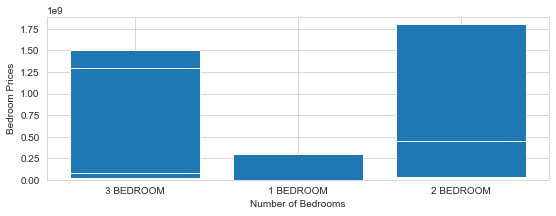

In [90]:
plt.figure(figsize = (9,3))
plt.bar(rooms['title'], rooms['price'])
plt.xlabel('Number of Bedrooms')
plt.ylabel('Bedroom Prices')
plt.show()

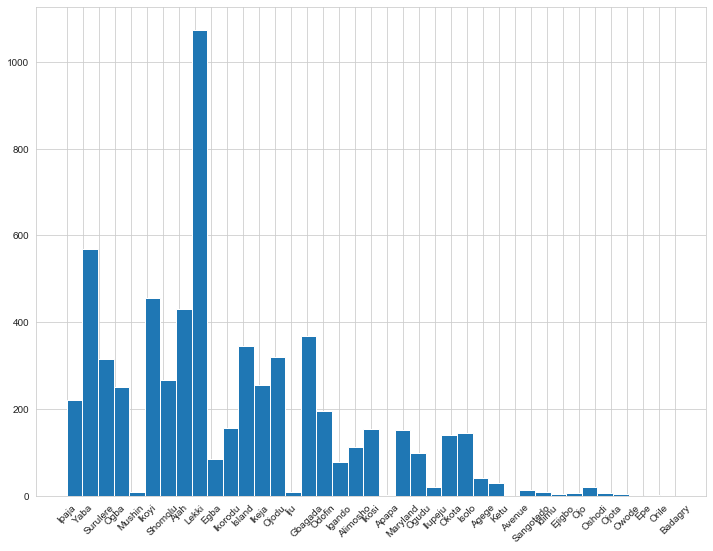

In [91]:
# visualising the data
plt.figure(figsize=(12,9))
plt.hist(rooms.location, bins=39)
plt.xticks(rotation=45)
plt.show()

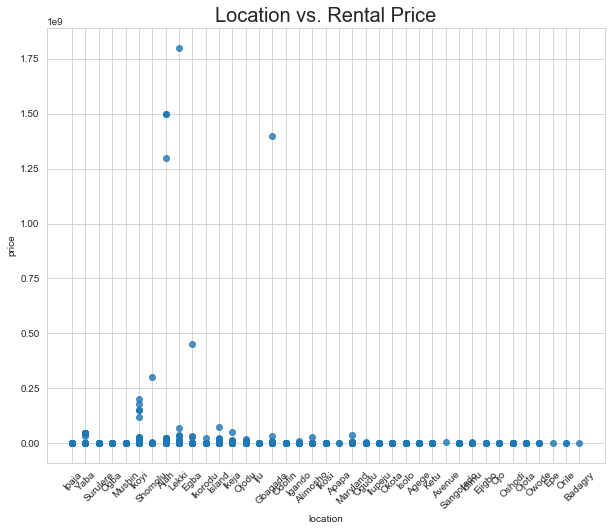

In [92]:
# creating a regression plot
#Plotting Regplot with Seaborn
plt.figure(figsize = (10,8))
sns.regplot(rooms.location, rooms.price, fit_reg=False)
plt.xticks(rotation=45)
plt.title('Location vs. Rental Price', fontsize = 20)
plt.show()

In [93]:
# single attr in location
rooms['location'].unique()

array(['Ipaja', 'Yaba', 'Surulere', 'Ogba', 'Mushin', 'Ikoyi', 'Shomolu',
       'Ajah', 'Lekki', 'Egba', 'Ikorodu', 'Island', 'Ikeja', 'Ojodu',
       'Iju', 'Gbagada', 'Odofin', 'Igando', 'Alimosho', 'Ikosi', 'Apapa',
       'Maryland', 'Ogudu', 'Ilupeju', 'Okota', 'Isolo', 'Agege', 'Ketu',
       'Avenue', 'Sangotedo', 'Idimu', 'Ejigbo', 'Ojo', 'Oshodi', 'Ojota',
       'Owode', 'Epe', 'Orile', 'Badagry'], dtype=object)

In [94]:
rooms.location.nunique()

39

In [95]:
rooms[rooms['location'] == 'Island']

,title,location,price
12,2 BEDROOM,Island,3000000
23,3 BEDROOM,Island,13000000
37,3 BEDROOM,Island,6000000
50,3 BEDROOM,Island,3000000
61,3 BEDROOM,Island,5000000
...,...,...,...
6229,3 BEDROOM,Island,6000000
6261,2 BEDROOM,Island,2700000
6290,3 BEDROOM,Island,75000000
6312,3 BEDROOM,Island,3500000


In [96]:
rooms[rooms['price'] > 75000000]['location'].count()

12

In [97]:
rooms[rooms['location'] == 'Apapa']

,title,location,price
44,3 BEDROOM,Apapa,2300000
5913,3 BEDROOM,Apapa,2000000


In [8]:
rooms.rename(columns={'title':'rooms'}, inplace=True)

In [9]:
rooms['rooms'] = rooms['rooms'].map({'1 BEDROOM':1, '2 BEDROOM':2, '3 BEDROOM':3}) 

In [63]:
rooms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6368 entries, 0 to 6367
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   rooms     6368 non-null   int64 
 1   location  6368 non-null   object
 2   price     6368 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 149.4+ KB


In [10]:
rooms['rooms'] = rooms['rooms'].astype('category')

In [16]:
# rooms.to_csv('rooms.csv', index=False)